In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\Admin\\OneDrive\\Documents\\Mldatasets\\uber.csv")

In [4]:
import numpy as np

In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt

In [7]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [9]:
df.shape

(200000, 9)

In [10]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [11]:
df['dropoff_longitude'].dropna(inplace = True)

In [12]:
df['dropoff_latitude'].dropna(inplace=True)

In [13]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [14]:
df['dropoff_longitude']

0        -73.999512
1        -73.994710
2        -73.962565
3        -73.965316
4        -73.973082
            ...    
199995   -73.986525
199996   -74.006672
199997   -73.858957
199998   -73.983215
199999   -73.985508
Name: dropoff_longitude, Length: 200000, dtype: float64

In [15]:
df.dropna(inplace = True)

In [16]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [17]:
df = df.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis = 1)

In [18]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

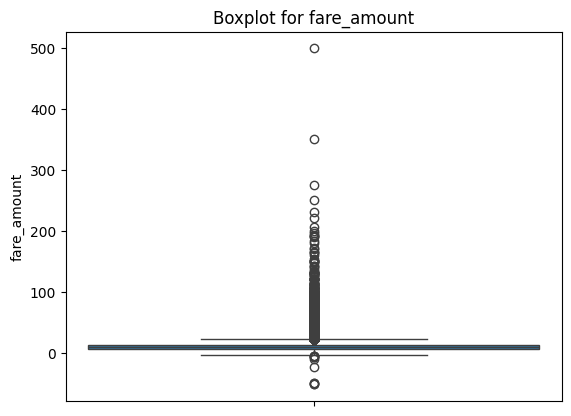

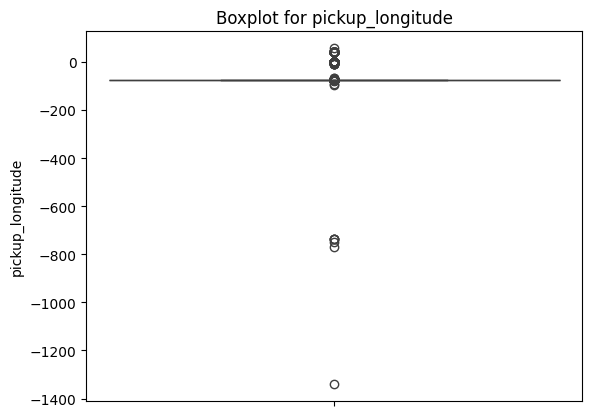

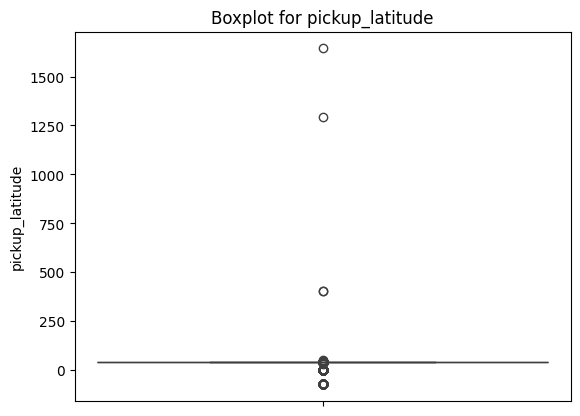

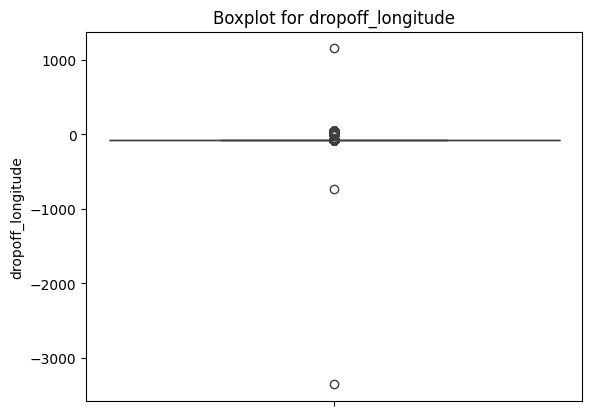

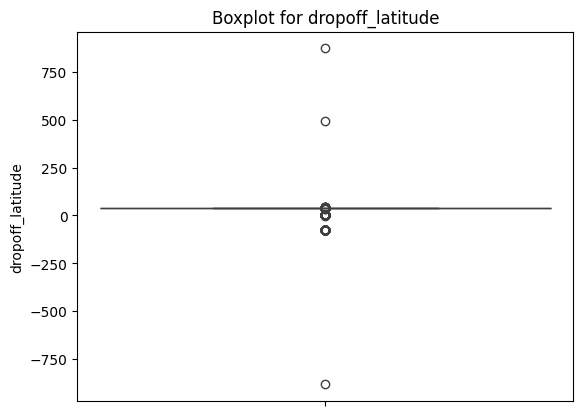

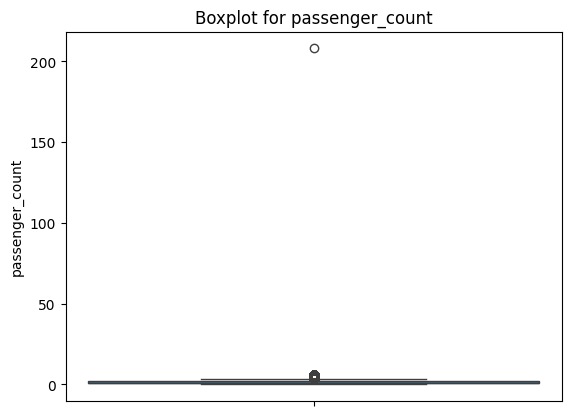

In [19]:
for i in df:
    sns.boxplot(data = df[i])
    plt.plot()
    plt.title(f'Boxplot for {i}')
    plt.show()

<Axes: >

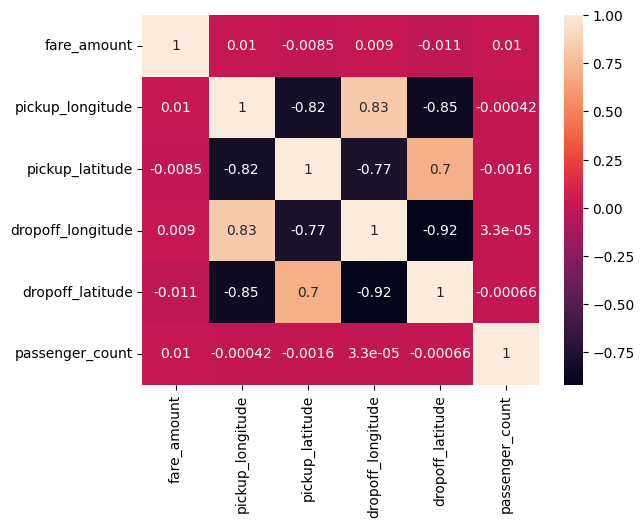

In [20]:
sns.heatmap(df.corr(), annot = True)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
x = df.drop('fare_amount', axis =1)
y = df['fare_amount']

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [27]:
x_train = scaler.fit_transform(x_train)

In [28]:
x_test = scaler.transform(x_test)

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(x_test)
y_pred

array([11.29237916, 11.29171388, 11.5718662 , ..., 11.29183291,
       11.43252639, 11.29190248])

In [32]:
from sklearn.metrics import r2_score, mean_squared_error

In [34]:
mse = mean_squared_error(y_test, y_pred)
mse

103.9884071266138

In [36]:
r2 = r2_score(y_test, y_pred)
r2

0.00034152697863043535

In [37]:
emse = np.sqrt(mse)
emse

10.197470623964248

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)

In [51]:
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [52]:
y_pred1 = rf.predict(x_test)

In [55]:
mserf = mean_squared_error(y_test, y_pred1)
mserf

32.791146289695334

In [56]:
r2rf = r2_score(y_test, y_pred1)
r2rf

0.68477306139842

In [57]:
rmse = np.sqrt(mserf)
rmse

5.726355410703682